# UPLOADING INPHINITY STOCKS DATASET CSV FILE

In [ ]:
from google.colab import files

uploaded = files.upload()

print(uploaded)

Saving inphinity_stocks_dataset.csv to inphinity_stocks_dataset.csv
{'inphinity_stocks_dataset.csv': b'Stock_Symbol,Year,Quarter,PE_Ratio,EPS,ROE,Debt_to_Equity,Price_at_Quarter_End,Price_3M_Later,Future_Return\r\nINFY,2020,Q1,22.3,63.5,28.2,0.06,1455,1512,3.92\r\nINFY,2020,Q2,23.1,65.2,28.9,0.05,1512,1568,3.7\r\nINFY,2020,Q3,21.8,67.1,29.5,0.04,1568,1645,4.91\r\nINFY,2020,Q4,22.5,68.5,30.2,0.05,1645,1680,2.13\r\nINFY,2021,Q1,24.5,70.2,31.5,0.06,1680,1625,-3.27\r\nINFY,2021,Q2,23.8,71.5,32.1,0.05,1625,1535,-5.54\r\nINFY,2021,Q3,22.1,72.8,32.8,0.04,1535,1598,4.1\r\nINFY,2021,Q4,21.3,74.2,33.5,0.05,1598,1720,7.63\r\nINFY,2022,Q1,20.5,75.8,34.2,0.04,1720,1685,-1.93\r\nINFY,2022,Q2,21.2,77.5,35.1,0.05,1685,1628,-3.38\r\nINFY,2022,Q3,22.8,79.2,36.8,0.06,1628,1542,-5.28\r\nINFY,2022,Q4,24.1,80.5,37.5,0.07,1542,1595,3.44\r\nINFY,2023,Q1,22.5,82.1,38.2,0.05,1595,1698,6.45\r\nINFY,2023,Q2,21.8,84.5,39.1,0.04,1698,1762,3.77\r\nINFY,2023,Q3,20.2,86.2,40.5,0.03,1762,1845,4.71\r\nINFY,2023,Q4,19.5,

##IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import json
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import time


## LOADING DATASET

In [ ]:
df = pd.read_csv('inphinity_stocks_dataset.csv')
print(f"Dataset loaded: {len(df)} rows, {len(df.columns)} columns")

Dataset loaded: 180 rows, 10 columns


# EDA

## INITIAL DATA EXPLORATION

In [ ]:
# Display first 10 rows

print("FIRST 10 ROWS OF DATASET")
print("\n")
display(df.head(10))
print("\n")
# Display dataset info
print("\n")
print("DATASET INFORMATION")
print("\n")
print(df.info())

# Display basic statistics
print("\n")
print("STATISTICAL SUMMARY")
print("\n")
display(df.describe())


FIRST 10 ROWS OF DATASET




,Stock_Symbol,Year,Quarter,PE_Ratio,EPS,ROE,Debt_to_Equity,Price_at_Quarter_End,Price_3M_Later,Future_Return
0,INFY,2020,Q1,22.3,63.5,28.2,0.06,1455.0,1512.0,3.92
1,INFY,2020,Q2,23.1,65.2,28.9,0.05,1512.0,1568.0,3.70
2,INFY,2020,Q3,21.8,67.1,29.5,0.04,1568.0,1645.0,4.91
3,INFY,2020,Q4,22.5,68.5,30.2,0.05,1645.0,1680.0,2.13
4,INFY,2021,Q1,24.5,70.2,31.5,0.06,1680.0,1625.0,-3.27
5,INFY,2021,Q2,23.8,71.5,32.1,0.05,1625.0,1535.0,-5.54
6,INFY,2021,Q3,22.1,72.8,32.8,0.04,1535.0,1598.0,4.10
7,INFY,2021,Q4,21.3,74.2,33.5,0.05,1598.0,1720.0,7.63
8,INFY,2022,Q1,20.5,75.8,34.2,0.04,1720.0,1685.0,-1.93
9,INFY,2022,Q2,21.2,77.5,35.1,0.05,1685.0,1628.0,-3.38






DATASET INFORMATION


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock_Symbol          180 non-null    object 
 1   Year                  180 non-null    int64  
 2   Quarter               180 non-null    object 
 3   PE_Ratio              180 non-null    float64
 4   EPS                   180 non-null    float64
 5   ROE                   180 non-null    float64
 6   Debt_to_Equity        180 non-null    float64
 7   Price_at_Quarter_End  180 non-null    float64
 8   Price_3M_Later        180 non-null    float64
 9   Future_Return         180 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 14.2+ KB
None


STATISTICAL SUMMARY




,Year,PE_Ratio,EPS,ROE,Debt_to_Equity,Price_at_Quarter_End,Price_3M_Later,Future_Return
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,2022.000000,25.795556,60.625000,36.787778,0.194722,1333.537222,1343.937222,1.497389
std,1.418158,11.392229,44.265738,21.603309,0.188616,1097.546091,1104.115656,7.952881
min,2020.000000,7.200000,9.800000,13.200000,0.010000,118.500000,118.500000,-15.380000
25%,2021.000000,19.500000,25.425000,21.500000,0.037500,443.750000,448.750000,-5.135000
50%,2022.000000,23.800000,40.850000,29.500000,0.120000,860.000000,895.000000,2.480000
75%,2023.000000,28.500000,93.500000,42.850000,0.380000,1985.000000,1985.000000,7.387500
max,2024.000000,56.800000,164.200000,95.000000,0.570000,4285.000000,4285.000000,25.710000


## Checking for Missing Values

In [ ]:
# Check missing values
print("\n")
print("MISSING VALUES CHECK")
print("\n")

missing = df.isnull().sum()
print(missing)

if missing.sum() == 0:
    print("\n No missing values found!")
else:
    print(f"\n Found {missing.sum()} missing values")

# Show columns
print("\n")
print("DATASET COLUMNS")
print("\n")
print(df.columns.tolist())




MISSING VALUES CHECK


Stock_Symbol            0
Year                    0
Quarter                 0
PE_Ratio                0
EPS                     0
ROE                     0
Debt_to_Equity          0
Price_at_Quarter_End    0
Price_3M_Later          0
Future_Return           0
dtype: int64

 No missing values found!


DATASET COLUMNS


['Stock_Symbol', 'Year', 'Quarter', 'PE_Ratio', 'EPS', 'ROE', 'Debt_to_Equity', 'Price_at_Quarter_End', 'Price_3M_Later', 'Future_Return']


# Cleaning Data & Generating Labels

## Auto Generating Labels from Future Returns

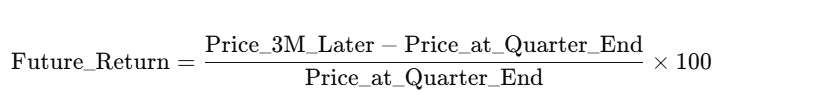

In [ ]:
df['Future_Return'] = ((df['Price_3M_Later'] - df['Price_at_Quarter_End']) /
                       df['Price_at_Quarter_End']) * 100


In [ ]:
df.head()

,Stock_Symbol,Year,Quarter,PE_Ratio,EPS,ROE,Debt_to_Equity,Price_at_Quarter_End,Price_3M_Later,Future_Return
0,INFY,2020,Q1,22.3,63.5,28.2,0.06,1455.0,1512.0,3.917526
1,INFY,2020,Q2,23.1,65.2,28.9,0.05,1512.0,1568.0,3.703704
2,INFY,2020,Q3,21.8,67.1,29.5,0.04,1568.0,1645.0,4.910714
3,INFY,2020,Q4,22.5,68.5,30.2,0.05,1645.0,1680.0,2.127660
4,INFY,2021,Q1,24.5,70.2,31.5,0.06,1680.0,1625.0,-3.273810


## Creating Label using thresholds

In [ ]:
def label_from_return(r):
    if r > 5:
        return 'BUY'
    elif r < -5:
        return 'SELL'
    else:
        return 'HOLD'

df['Label'] = df['Future_Return'].apply(label_from_return)
df[['Stock_Symbol', 'Year', 'Quarter', 'Future_Return', 'Label']].head(12)


,Stock_Symbol,Year,Quarter,Future_Return,Label
0,INFY,2020,Q1,3.917526,HOLD
1,INFY,2020,Q2,3.703704,HOLD
2,INFY,2020,Q3,4.910714,HOLD
3,INFY,2020,Q4,2.127660,HOLD
4,INFY,2021,Q1,-3.273810,HOLD
5,INFY,2021,Q2,-5.538462,SELL
6,INFY,2021,Q3,4.104235,HOLD
7,INFY,2021,Q4,7.634543,BUY
8,INFY,2022,Q1,-2.034884,HOLD
9,INFY,2022,Q2,-3.382789,HOLD


# Visualizing Label Distribution

/tmp/ipython-input-2059251210.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette='viridis', ax=axes[0])


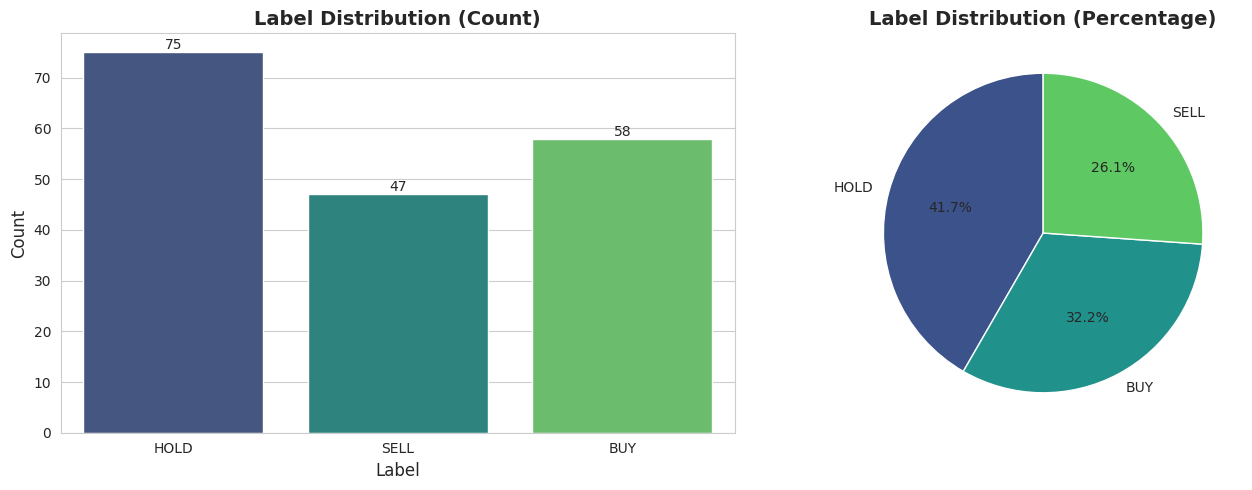

Visualization completed!


In [ ]:
# Set style
sns.set_style('whitegrid')

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Count plot
sns.countplot(x='Label', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Label Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Label', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Add count labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container)

# Plot 2: Pie chart
label_counts = df['Label'].value_counts()
axes[1].pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
            startangle=90, colors=sns.color_palette('viridis', len(label_counts)))
axes[1].set_title('Label Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("Visualization completed!")


# Feature Analysis & Visualization

/tmp/ipython-input-1194890117.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=feature, data=df, palette='Set2', ax=axes[idx])
/tmp/ipython-input-1194890117.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=feature, data=df, palette='Set2', ax=axes[idx])
/tmp/ipython-input-1194890117.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=feature, data=df, palette='Set2', ax=axes[idx])
/tmp/ipython-input-1194890117.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

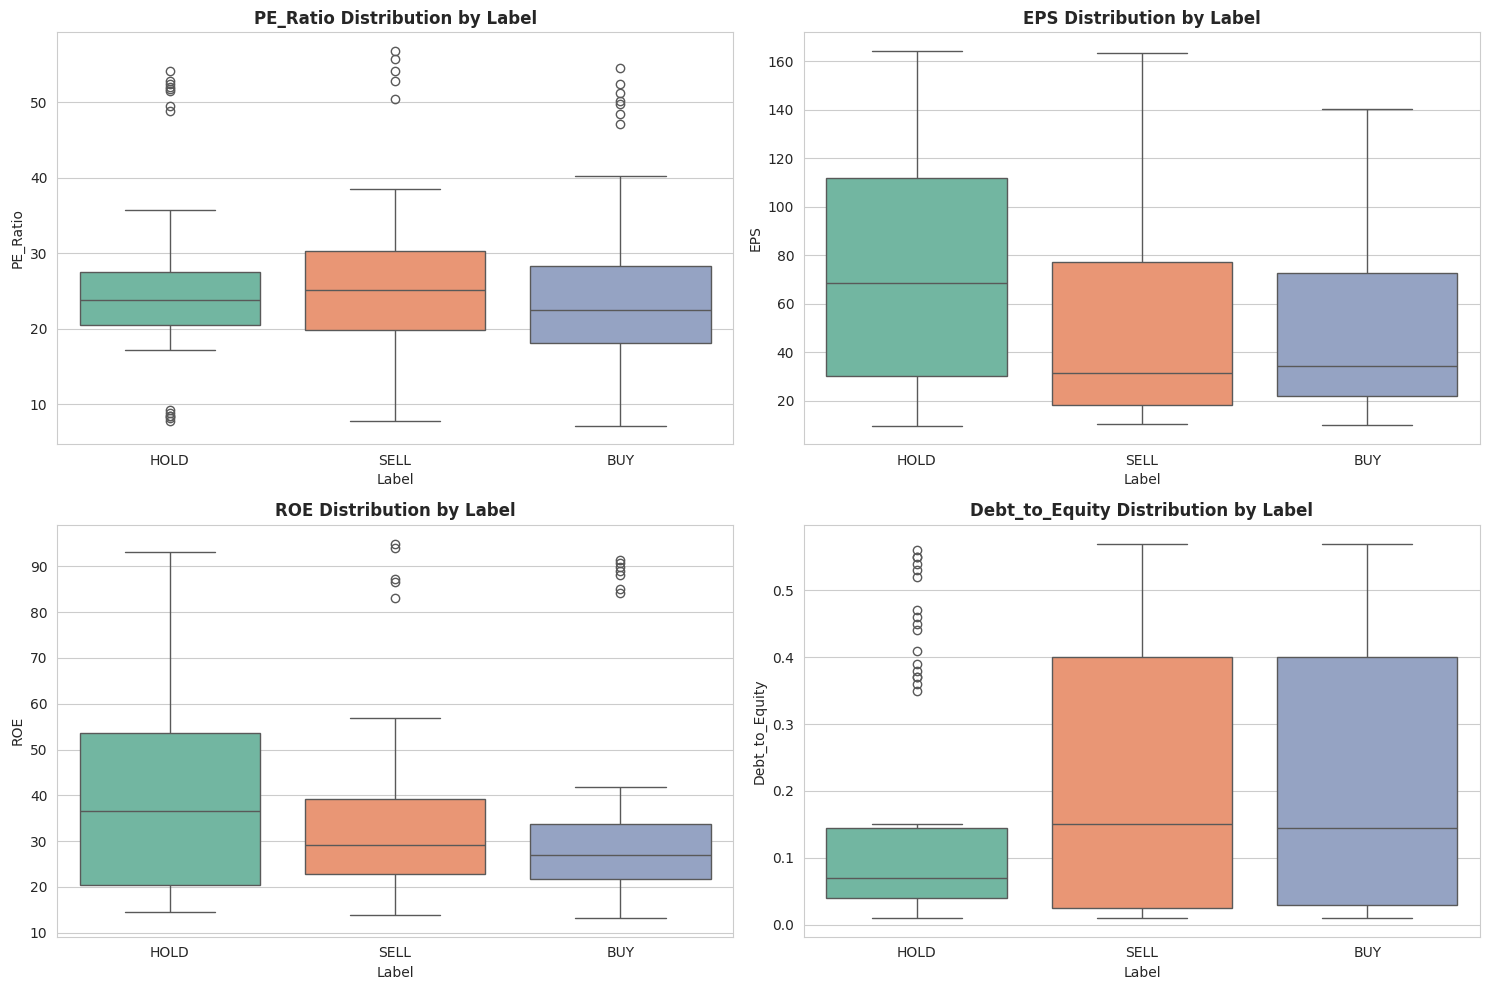

Feature analysis complete!


In [ ]:
# Box plots for each feature by label
features = ['PE_Ratio', 'EPS', 'ROE', 'Debt_to_Equity']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(features):
    sns.boxplot(x='Label', y=feature, data=df, palette='Set2', ax=axes[idx])
    axes[idx].set_title(f'{feature} Distribution by Label', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Label', fontsize=10)
    axes[idx].set_ylabel(feature, fontsize=10)

plt.tight_layout()
plt.show()

print("Feature analysis complete!")


# Correlation Heatmap

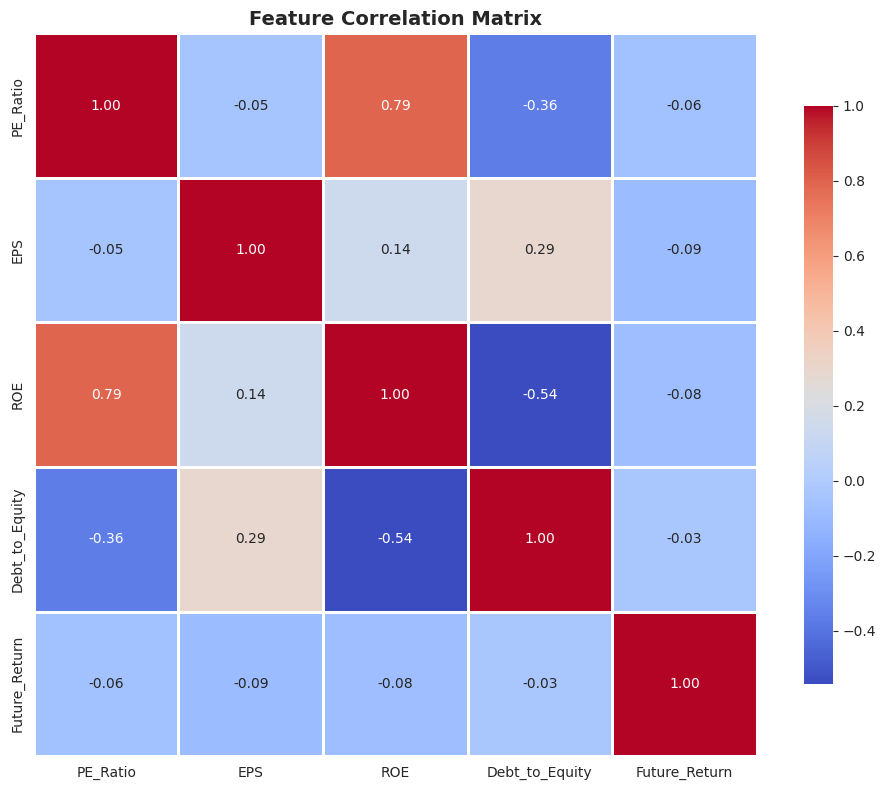

Correlation analysis complete!


In [ ]:
# Correlation matrix
correlation_features = ['PE_Ratio', 'EPS', 'ROE', 'Debt_to_Equity', 'Future_Return']

plt.figure(figsize=(10, 8))
corr_matrix = df[correlation_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation analysis complete!")


# Preparing Data for ML

## Splitting Features and Labels

In [ ]:
# Define features (X) and labels (y)
X = df[['PE_Ratio', 'EPS', 'ROE', 'Debt_to_Equity']]
y = df['Label']

print("\n")
print("FEATURES (X) AND LABELS (y) PREPARED")
print("\n")
print(f"\nFeatures shape: {X.shape}")
print(f"Labels shape: {y.shape}")

print("\nFeatures (first 5 rows):")
display(X.head())

print("\nLabels (first 5 rows):")
print(y.head().tolist())

print("\n Data prepared for training!")




FEATURES (X) AND LABELS (y) PREPARED



Features shape: (180, 4)
Labels shape: (180,)

Features (first 5 rows):


,PE_Ratio,EPS,ROE,Debt_to_Equity
0,22.3,63.5,28.2,0.06
1,23.1,65.2,28.9,0.05
2,21.8,67.1,29.5,0.04
3,22.5,68.5,30.2,0.05
4,24.5,70.2,31.5,0.06



Labels (first 5 rows):
['HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD']

 Data prepared for training!


## TRAIN TEST SPLIT

In [ ]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% for testing
    random_state=42,     # For reproducibility
    stratify=y           # Maintain label distribution
)

print("\n")
print("TRAIN-TEST SPLIT COMPLETE")
print("\n")
print(f"\n Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

print("\nLabel distribution in training set:")
print(y_train.value_counts())

print("\nLabel distribution in test set:")
print(y_test.value_counts())

print("\nData split successfully!")




TRAIN-TEST SPLIT COMPLETE



 Training set: 144 samples (80.0%)
Test set: 36 samples (20.0%)

Label distribution in training set:
Label
HOLD    60
BUY     46
SELL    38
Name: count, dtype: int64

Label distribution in test set:
Label
HOLD    15
BUY     12
SELL     9
Name: count, dtype: int64

Data split successfully!


# Training Random Forest Model

In [ ]:
print("\n")
print("TRAINING RANDOM FOREST MODEL")
print("\n")

# Create Random Forest Classifier
model = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest
    max_depth=10,            # Maximum depth of trees
    min_samples_split=5,     # Minimum samples required to split
    min_samples_leaf=2,      # Minimum samples at leaf node
    random_state=42,         # For reproducibility
    n_jobs=-1                # Use all CPU cores
)

# Train the model
print("\nTraining in progress...")
start_time = time.time()

model.fit(X_train, y_train)

end_time = time.time()
training_time = end_time - start_time

print(f"Training completed in {training_time:.2f} seconds!")

# Make predictions on training set (to check overfitting)
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"\nTraining Accuracy: {train_accuracy*100:.2f}%")




TRAINING RANDOM FOREST MODEL



Training in progress...
Training completed in 0.23 seconds!

Training Accuracy: 92.36%


# Evaluate Model Performance

## Test Set Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("\n")
print("MODEL EVALUATION ON TEST SET")
print("\n")

# Make predictions on test set
y_test_pred = model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")

# Detailed classification report
print("\n")
print("CLASSIFICATION REPORT")
print("\n")
print(classification_report(y_test, y_test_pred))

# Check for overfitting
print("\n")
print("OVERFITTING CHECK")
print("\n")
print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
diff = train_accuracy - test_accuracy
if diff < 0.05:
    print(f"Model is well-fitted (difference: {diff*100:.2f}%)")
elif diff < 0.10:
    print(f"Slight overfitting (difference: {diff*100:.2f}%)")
else:
    print(f"Model is overfitting (difference: {diff*100:.2f}%)")




MODEL EVALUATION ON TEST SET



Test Accuracy: 63.89%


CLASSIFICATION REPORT


              precision    recall  f1-score   support

         BUY       0.62      0.67      0.64        12
        HOLD       0.73      0.73      0.73        15
        SELL       0.50      0.44      0.47         9

    accuracy                           0.64        36
   macro avg       0.62      0.61      0.61        36
weighted avg       0.64      0.64      0.64        36



OVERFITTING CHECK


Training Accuracy: 92.36%
Test Accuracy: 63.89%
Model is overfitting (difference: 28.47%)


## Confusion Matrix Visualization

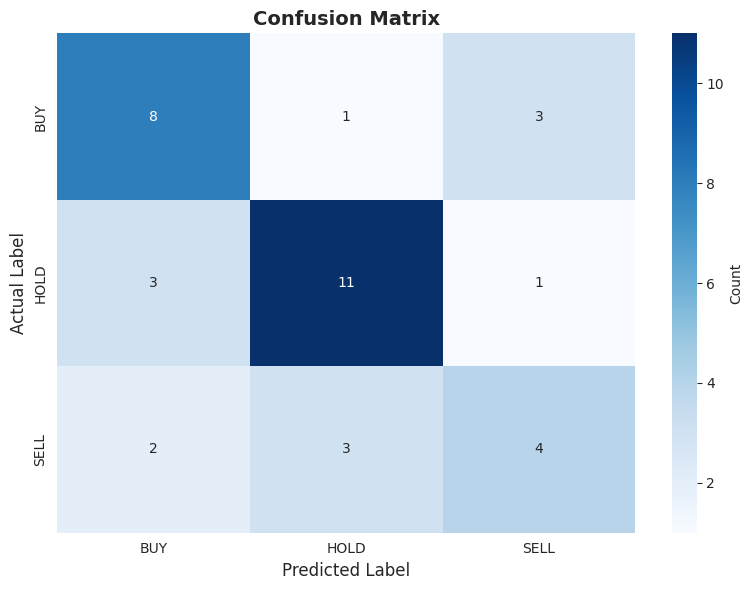

Confusion matrix plotted!


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred, labels=['BUY', 'HOLD', 'SELL'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['BUY', 'HOLD', 'SELL'],
            yticklabels=['BUY', 'HOLD', 'SELL'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print("Confusion matrix plotted!")


# Feature Importance Analysis



FEATURE IMPORTANCE


          Feature  Importance
2             ROE    0.354052
1             EPS    0.309211
3  Debt_to_Equity    0.184235
0        PE_Ratio    0.152502


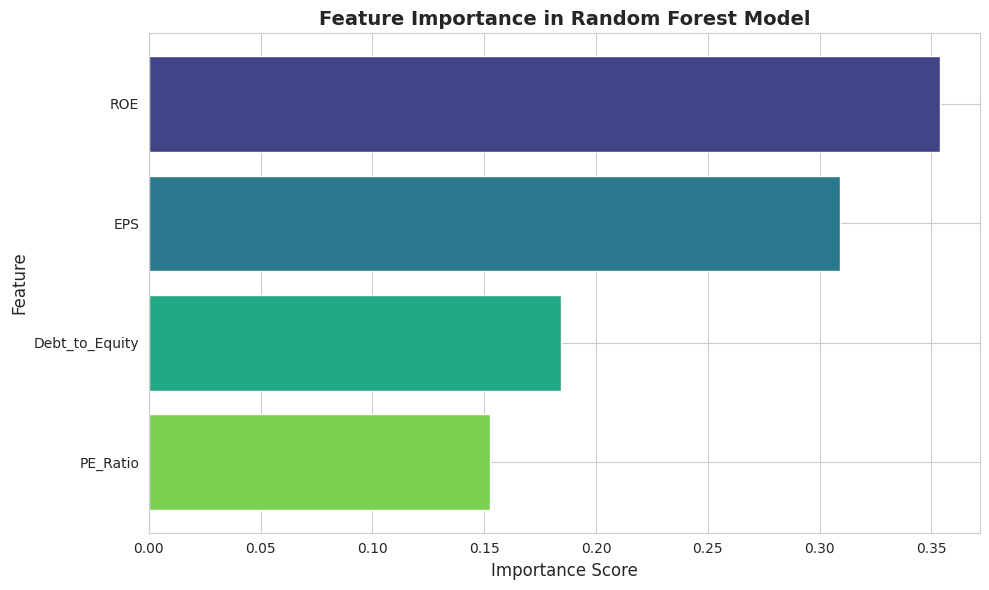


Feature importance analysis complete!

Most important feature: ROE


In [ ]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': ['PE_Ratio', 'EPS', 'ROE', 'Debt_to_Equity'],
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n")
print("FEATURE IMPORTANCE")
print("\n")
print(feature_importance)

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'],
         color=sns.color_palette('viridis', len(feature_importance)))
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance in Random Forest Model', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest importance on top
plt.tight_layout()
plt.show()

print("\nFeature importance analysis complete!")
print(f"\nMost important feature: {feature_importance.iloc[0]['Feature']}")


# Generating Predictions for Latest Quarter

In [ ]:
# Get latest quarter data for each stock (most recent row per stock)
latest_data = df.sort_values('Year').groupby('Stock_Symbol').tail(1)

print("\n")
print("GENERATING PREDICTIONS FOR LATEST QUARTER")
print("\n")

# Extract features
X_latest = latest_data[['PE_Ratio', 'EPS', 'ROE', 'Debt_to_Equity']]

# Make predictions
predictions = model.predict(X_latest)
probabilities = model.predict_proba(X_latest)

# Create results dataframe
results = pd.DataFrame({
    'Stock': latest_data['Stock_Symbol'].values,
    'Prediction': predictions,
    'Confidence_BUY': (probabilities[:, 0] * 100).round(1),
    'Confidence_HOLD': (probabilities[:, 1] * 100).round(1),
    'Confidence_SELL': (probabilities[:, 2] * 100).round(1)
})

# Add overall confidence (max probability)
results['Confidence'] = results[['Confidence_BUY', 'Confidence_HOLD', 'Confidence_SELL']].max(axis=1)

print("\nPredictions:")
display(results[['Stock', 'Prediction', 'Confidence']])

print("\nPredictions generated successfully!")




GENERATING PREDICTIONS FOR LATEST QUARTER



Predictions:


,Stock,Prediction,Confidence
0,TCS,HOLD,99.8
1,INFY,HOLD,85.4
2,WIPRO,HOLD,58.8
3,ONGC,HOLD,70.9
4,M&M,SELL,68.2
5,RELIANCE,SELL,81.3
6,KPITTECH,SELL,54.3
7,HUL,BUY,69.3
8,QUICKHEAL,SELL,62.2



Predictions generated successfully!


# Exporting Predictions

In [ ]:
import json

# Create predictions dictionary for each stock
predictions_dict = {}

for idx, row in results.iterrows():
    stock = row['Stock']
    predictions_dict[stock] = {
        'recommendation': row['Prediction'],
        'confidence': float(row['Confidence']),
        'probabilities': {
            'BUY': float(row['Confidence_BUY']),
            'HOLD': float(row['Confidence_HOLD']),
            'SELL': float(row['Confidence_SELL'])
        }
    }

# Save as JSON
with open('predictions.json', 'w') as f:
    json.dump(predictions_dict, f, indent=2)

print("\n")
print("PREDICTIONS SAVED AS JSON")
print("\n")
print("\nFile: predictions.json")
print("\nContent preview:")
print(json.dumps(predictions_dict, indent=2))

# Download the file
files.download('predictions.json')
print("\npredictions.json downloaded!")




PREDICTIONS SAVED AS JSON



File: predictions.json

Content preview:
{
  "TCS": {
    "recommendation": "HOLD",
    "confidence": 99.8,
    "probabilities": {
      "BUY": 0.0,
      "HOLD": 99.8,
      "SELL": 0.2
    }
  },
  "INFY": {
    "recommendation": "HOLD",
    "confidence": 85.4,
    "probabilities": {
      "BUY": 10.4,
      "HOLD": 85.4,
      "SELL": 4.2
    }
  },
  "WIPRO": {
    "recommendation": "HOLD",
    "confidence": 58.8,
    "probabilities": {
      "BUY": 34.7,
      "HOLD": 58.8,
      "SELL": 6.4
    }
  },
  "ONGC": {
    "recommendation": "HOLD",
    "confidence": 70.9,
    "probabilities": {
      "BUY": 21.8,
      "HOLD": 70.9,
      "SELL": 7.3
    }
  },
  "M&M": {
    "recommendation": "SELL",
    "confidence": 68.2,
    "probabilities": {
      "BUY": 8.7,
      "HOLD": 23.2,
      "SELL": 68.2
    }
  },
  "RELIANCE": {
    "recommendation": "SELL",
    "confidence": 81.3,
    "probabilities": {
      "BUY": 17.0,
      "HOLD": 1.8,
      "SELL"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


predictions.json downloaded!


# SAVING TRAINED MODEL

In [ ]:
import pickle

# Save the trained model
with open('stock_recommendation_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("\n")
print("MODEL SAVED")
print("\n")
print("\nFile: stock_recommendation_model.pkl")
print(f"Size: {len(pickle.dumps(model))/1024:.2f} KB")

# Download the model file
files.download('stock_recommendation_model.pkl')

print("\nModel file downloaded!")




MODEL SAVED



File: stock_recommendation_model.pkl
Size: 460.90 KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Model file downloaded!


# QUICK Prediction Test

In [ ]:
# Example: Make a prediction for custom input
print("\n")
print("EXAMPLE PREDICTION TEST")
print("\n")

# Sample stock data (you can change these values)
test_stock = {
    'PE_Ratio': 20.5,
    'EPS': 95.8,
    'ROE': 45.2,
    'Debt_to_Equity': 0.04
}

print(f"\nInput Features:")
for key, value in test_stock.items():
    print(f"   {key}: {value}")

# Convert to dataframe
X_test_sample = pd.DataFrame([test_stock])

# Make prediction
prediction = model.predict(X_test_sample)[0]
probability = model.predict_proba(X_test_sample)[0]

# Get confidence for predicted class
pred_idx = list(model.classes_).index(prediction)
confidence = probability[pred_idx] * 100

print(f"\nPrediction: {prediction}")
print(f"Confidence: {confidence:.1f}%")

print("\nDetailed Probabilities:")
for label, prob in zip(model.classes_, probability):
    print(f"   {label}: {prob*100:.1f}%")

print("\nPrediction test complete!")




EXAMPLE PREDICTION TEST



Input Features:
   PE_Ratio: 20.5
   EPS: 95.8
   ROE: 45.2
   Debt_to_Equity: 0.04

Prediction: HOLD
Confidence: 98.4%

Detailed Probabilities:
   BUY: 1.4%
   HOLD: 98.4%
   SELL: 0.2%

Prediction test complete!


# SUMMARY

In [ ]:
print("\n")
print("ML PIPELINE SUMMARY")
print("\n")

print(f"\nDATASET")
print(f"   Total Samples: {len(df)}")
print(f"   Features: {', '.join(X.columns.tolist())}")
print(f"   Classes: {', '.join(model.classes_)}")

print(f"\nMODEL PERFORMANCE")
print(f"   Algorithm: Random Forest Classifier")
print(f"   Number of Trees: {model.n_estimators}")
print(f"   Training Accuracy: {train_accuracy*100:.2f}%")
print(f"   Test Accuracy: {test_accuracy*100:.2f}%")

print(f"\nFEATURE IMPORTANCE")
for idx, row in feature_importance.iterrows():
    print(f"   {row['Feature']}: {row['Importance']*100:.1f}%")

print(f"\nEXPORTED FILES")
print(f"   predictions.json (for backend integration)")
print(f"   stock_recommendation_model.pkl (trained model)")






ML PIPELINE SUMMARY



DATASET
   Total Samples: 180
   Features: PE_Ratio, EPS, ROE, Debt_to_Equity
   Classes: BUY, HOLD, SELL

MODEL PERFORMANCE
   Algorithm: Random Forest Classifier
   Number of Trees: 100
   Training Accuracy: 92.36%
   Test Accuracy: 63.89%

FEATURE IMPORTANCE
   ROE: 35.4%
   EPS: 30.9%
   Debt_to_Equity: 18.4%
   PE_Ratio: 15.3%

EXPORTED FILES
   predictions.json (for backend integration)
   stock_recommendation_model.pkl (trained model)
